# Test 7

Guys we are so close omgfaghjksfhdjksldfgmn

## Test-Wide Thingymabobbies

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score, ConfusionMatrixDisplay
import monke_features as mf
import monke_classify as mc
import monke_io as mio
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os.path as path
import itertools

In [2]:
# KOI
names_koi = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

pose_data_koi = mio.read_poses(names_koi)
tremors_raw = mio.read_tremors_multi(names_koi)
labels_koi = {}

for name in tremors_raw:
    labels_koi[name] = mf.generate_labelled_frames(pose_data_koi[name], tremors_raw[name])

# BOBA
names_boba = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_boba = mio.read_poses(names_boba)
tremors_raw = mio.read_tremors_multi(names_boba)
labels_boba = {}

for name in tremors_raw:
    labels_boba[name] = mf.generate_labelled_frames(pose_data_boba[name], tremors_raw[name])

# BANDUNG
names_bandung = ["bandung_mar27", "bandung_mar27_2", "bandung_mar27_3", "bandung_may19_2"]

pose_data_bandung = mio.read_poses(names_bandung)
tremors_raw = mio.read_tremors_multi(names_bandung)
labels_bandung = {}

for name in tremors_raw:
    labels_bandung[name] = mf.generate_labelled_frames(pose_data_bandung[name], tremors_raw[name])

# HORLICKS
names_horlicks = ["horlicks_apr12", "horlicks_may2", "horlicks_jun16"]

pose_data_horlicks = mio.read_poses(names_horlicks)
tremors_raw = mio.read_tremors_multi(names_horlicks)
labels_horlicks = {}

for name in tremors_raw:
    labels_horlicks[name] = mf.generate_labelled_frames(pose_data_horlicks[name], tremors_raw[name])
    
# BRIYANI
names_briyani = ["briyani_apr12", "briyani_may19", "briyani_jun16"]

pose_data_briyani = mio.read_poses(names_briyani)
tremors_raw = mio.read_tremors_multi(names_briyani)
labels_briyani = {}

for name in tremors_raw:
    labels_briyani[name] = mf.generate_labelled_frames(pose_data_briyani[name], tremors_raw[name])
    
# TUTU KUEH
names_tutukueh = ["tutukueh_apr21", "tutukueh_may2", "tutukueh_jun15"]

pose_data_tutukueh = mio.read_poses(names_tutukueh)
tremors_raw = mio.read_tremors_multi(names_tutukueh)
labels_tutukueh = {}

for name in tremors_raw:
    labels_tutukueh[name] = mf.generate_labelled_frames(pose_data_tutukueh[name], tremors_raw[name])

# ALL
names_all = {"koi":names_koi, "boba":names_boba, "bandung":names_bandung, 
             "horlicks":names_horlicks, "briyani":names_briyani, "tutukueh":names_tutukueh}
pose_data_all = {"koi":pose_data_koi, "boba":pose_data_boba, "bandung":pose_data_bandung, 
             "horlicks":pose_data_horlicks, "briyani":pose_data_briyani, "tutukueh":pose_data_tutukueh}
labels_all = {"koi":labels_koi, "boba":labels_boba, "bandung":labels_bandung, 
             "horlicks":labels_horlicks, "briyani":labels_briyani, "tutukueh":labels_tutukueh}

## Test 7A: Monkey-on-Monkey (the Sequel)

**Aim**: Check how training on a marmoset and testing on that same marmoset / another marmoset produces different predictions.

**Feature(s) Tested**: Directional Change

**Noise Correction**: 0.1 threshold and 10 sliding window

**Weights**: None

**Class Balance**: Balanced

### Datasets Information

_Training_
* All videos, divided by marmoset (80%)

_Testing_
* All videos, divided by marmoset (20%)

### Actual Code

In [28]:
train_data_7a = {}
test_data_7a = {}
train_labels_7a = {}
test_labels_7a = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data_7a[name], test_data_dict, train_labels_7a[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])
    
    test_data_merged = []
    test_labels_merged = []

    for test_name in test_data_dict:
        test_data_merged.append(test_data_dict[test_name])
        test_labels_merged.append(test_labels_dict[test_name])

    test_data_7a[name] = np.concatenate(test_data_merged)
    test_labels_7a[name] = np.concatenate(test_labels_merged)


In [52]:
results_7a = {}
train_names_7a = ["koi", "boba", "bandung"]
test_names_7a = ["koi", "boba", "bandung", "horlicks", "briyani", "tutukueh"]

clf = RandomForestClassifier(class_weight="balanced")

for train_name in train_names_7a:
    results_7a[train_name] = {}

    clf.fit(train_data_7a[train_name], train_labels_7a[train_name])

    for test_name in test_names_7a:
        results_7a[train_name][test_name] = test_classify(clf, test_data_7a[test_name], test_labels_7a[test_name])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.frame

In [53]:
visualise_mcc_7a = []

for train_name in results_7a:
    row = []
    for test_name in results_7a:
        row.append(results_7a[train_name][test_name]["mcc"])
    visualise_mcc_7a.append(row)

visualise_acc_7a = []

test_only_names_7a = ["horlicks", "briyani", "tutukueh"]

for train_name in results_7a:
    row = []
    for test_name in test_only_names_7a:
        row.append(results_7a[train_name][test_name]["accuracy"])
    visualise_acc_7a.append(row)


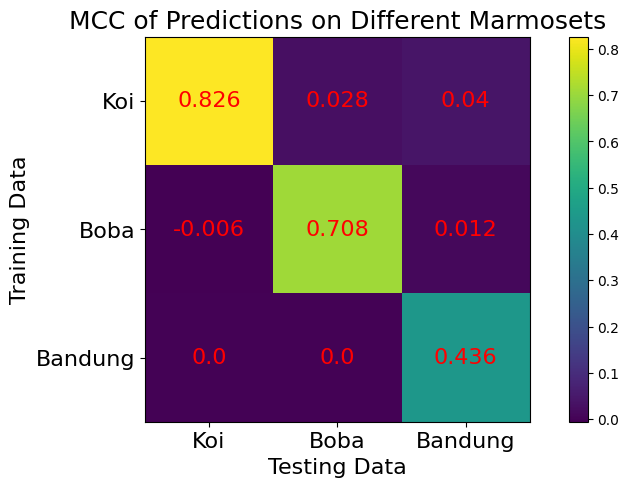

In [60]:
plt.imshow(visualise_mcc_7a, cmap='viridis', interpolation='nearest')

for i in range(len(visualise_mcc_7a)):
    for j in range(len(visualise_mcc_7a[i])):
        plt.text(j, i, round(visualise_mcc_7a[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("MCC of Predictions on Different Marmosets", size=18)

plt.xticks(list(range(len(train_names_7a))), [s.capitalize() for s in train_names_7a], size=16)
plt.yticks(list(range(len(train_names_7a))), [s.capitalize() for s in train_names_7a], size=16)

plt.colorbar()
plt.gcf().set_size_inches(10, 5)

# Show the plot
plt.show()

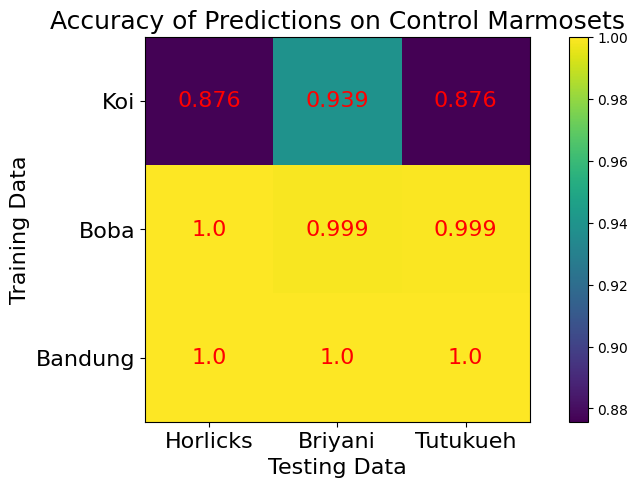

In [56]:
plt.imshow(visualise_acc_7a, cmap='viridis', interpolation='nearest')

for i in range(len(visualise_acc_7a)):
    for j in range(len(visualise_acc_7a[i])):
        plt.text(j, i, round(visualise_acc_7a[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("Accuracy of Predictions on Control Marmosets", size=18)

plt.xticks(list(range(len(test_only_names_7a))), [s.capitalize() for s in test_only_names_7a], size=16)
plt.yticks(list(range(len(train_names_7a))), [s.capitalize() for s in train_names_7a], size=16)

plt.colorbar()
plt.gcf().set_size_inches(10, 5)

# Show the plot
plt.show()

### Confusion Matrices

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


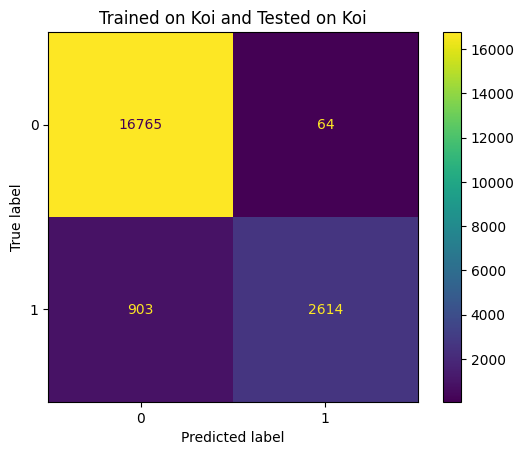

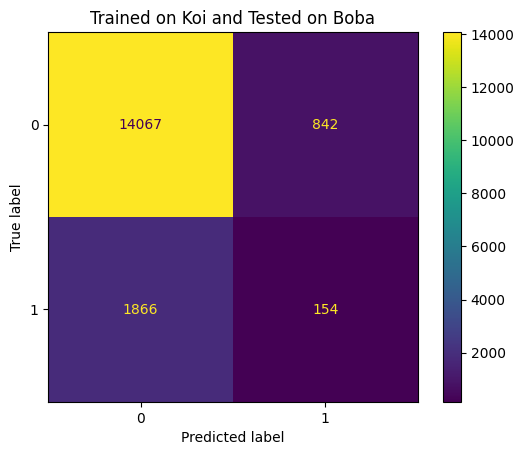

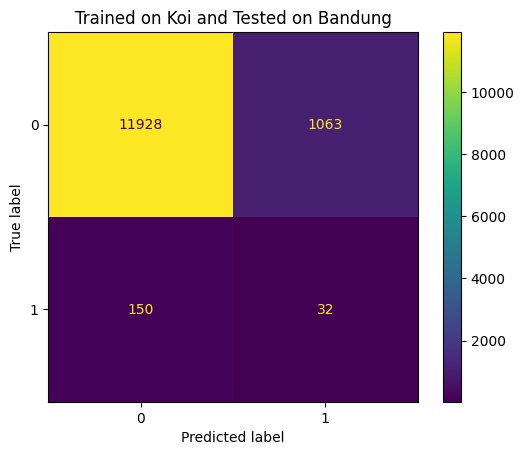

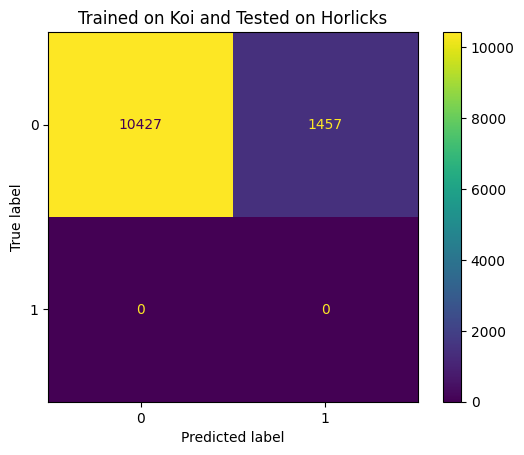

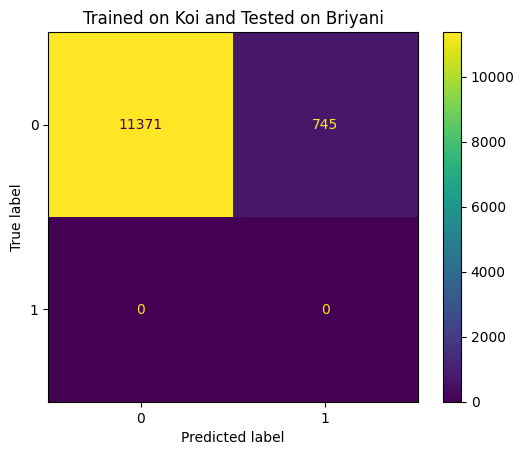

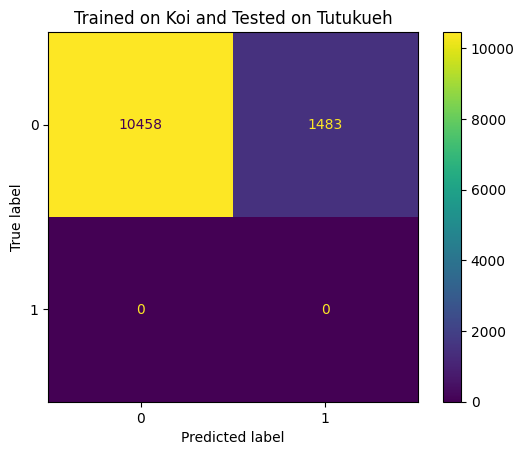

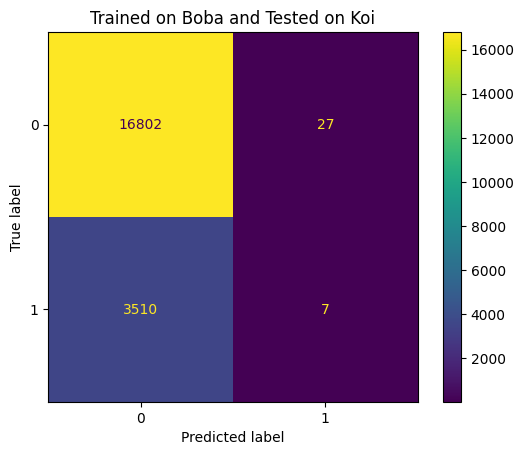

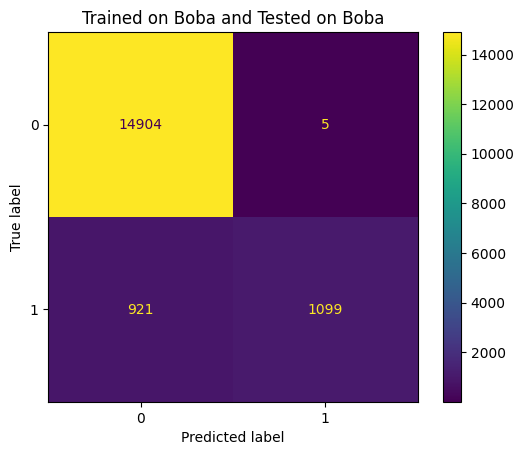

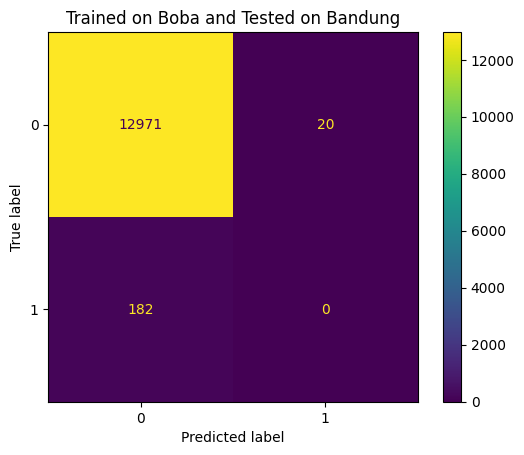

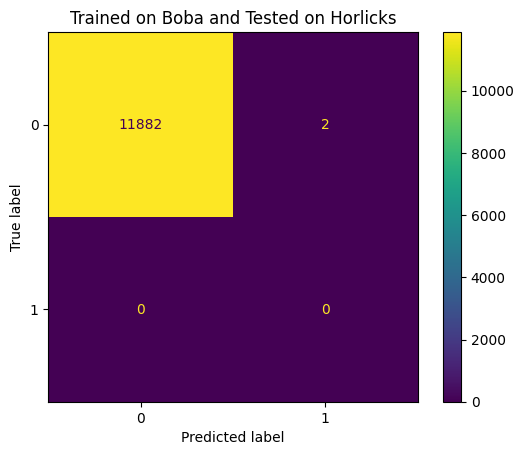

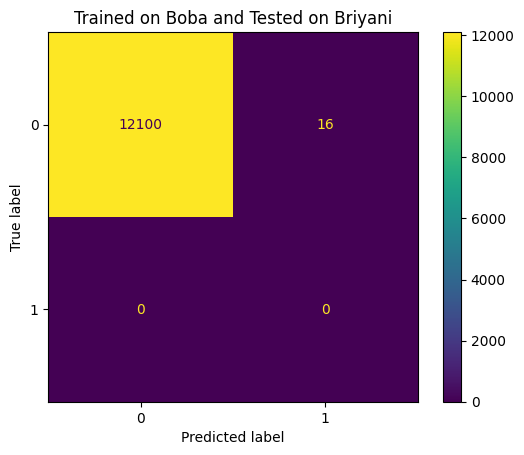

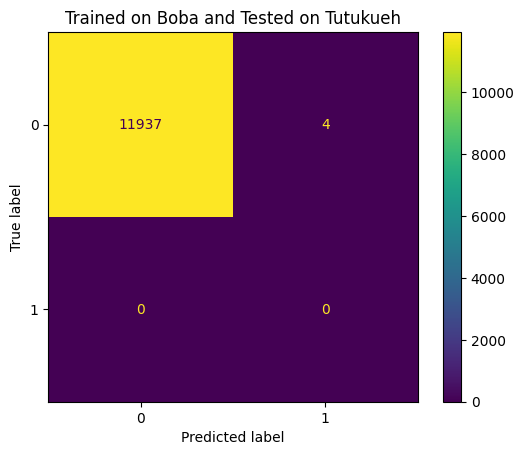

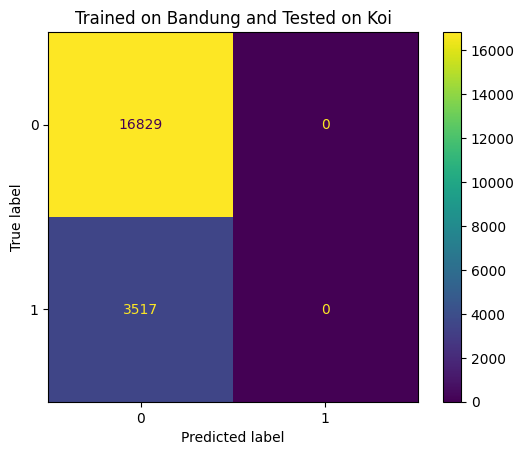

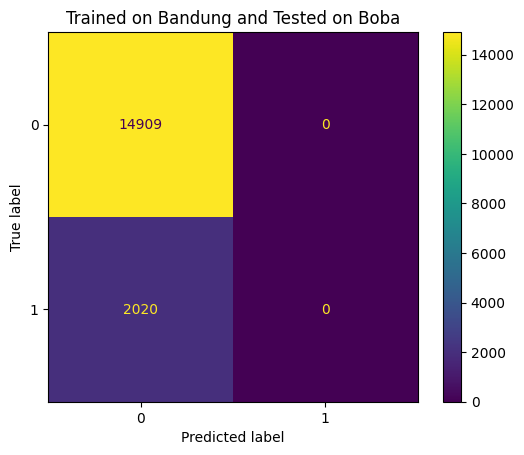

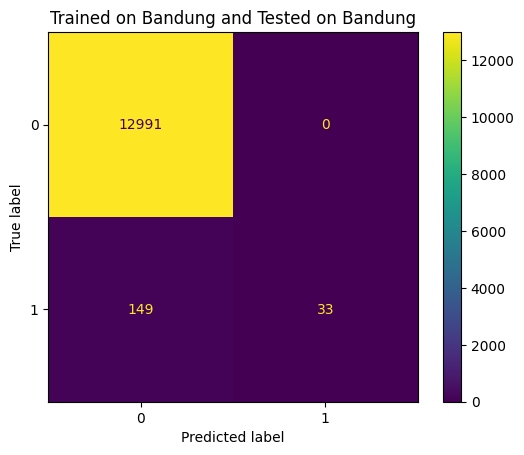

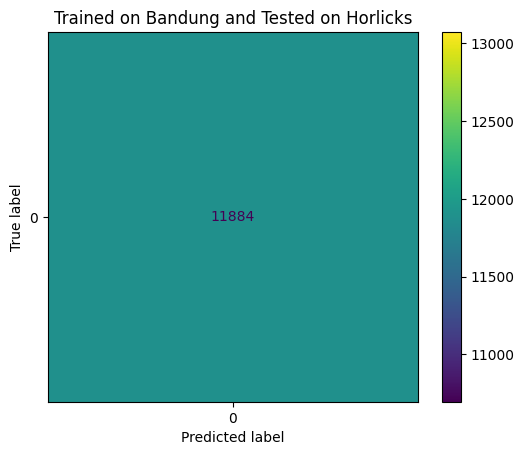

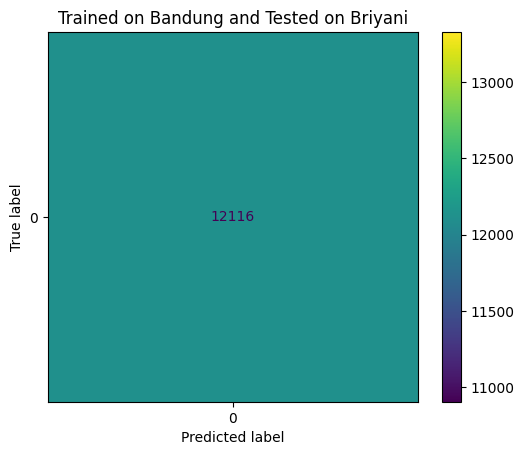

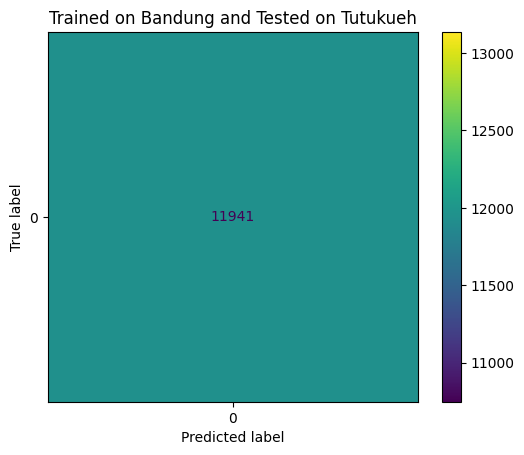

In [41]:
for train_name in results_7a:
    for test_name in results_7a[train_name]:
        cmd = ConfusionMatrixDisplay.from_predictions(test_labels_7a[test_name], 
                                                      results_7a[train_name][test_name]["predictions"], 
                                                      values_format="d")
        cmd.ax_.set_title(f"Trained on {train_name.capitalize()} and Tested on {test_name.capitalize()}")
plt.show()

## Test 7B: Noise Reduction

**Aim**: Check which sliding window size and threshold value produces the best results.

**Feature(s) Tested**: Directional Change

**Noise Correction**

_Thresholds_
* 0.0
* 0.05
* 0.1
* 0.15
* 0.2

_Sliding Window Sizes_
* 1
* 5
* 10
* 15 
* 20

**Weights**: None

**Class Balance**: None

### Datasets Information

__Training Data__
* All available Koi videos (80%)

__Testing Data__
* All available Koi videos (20%)

### Actual Code

In [21]:
thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
window_sizes = [1, 10, 20, 30, 40, 50, 60]

results_7b = {}

for ws in window_sizes:
    for t in thresholds:
        process = lambda x : mf.changes_in_changes(mf.vel(x), ws, t)
        pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
        training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
        clf = RandomForestClassifier(class_weight="balanced")
        clf.fit(training_data, training_labels)

        testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
        testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

        results_7b[(ws, t)] = mc.test_classify(clf, testing_data_merged, testing_labels_merged)

In [28]:
df = pd.DataFrame(results_7b)
cd = Path(path.abspath(""))
df.to_csv(path.join(cd, "classification", "test7", "test7b_full_range.csv"))

### Graphs

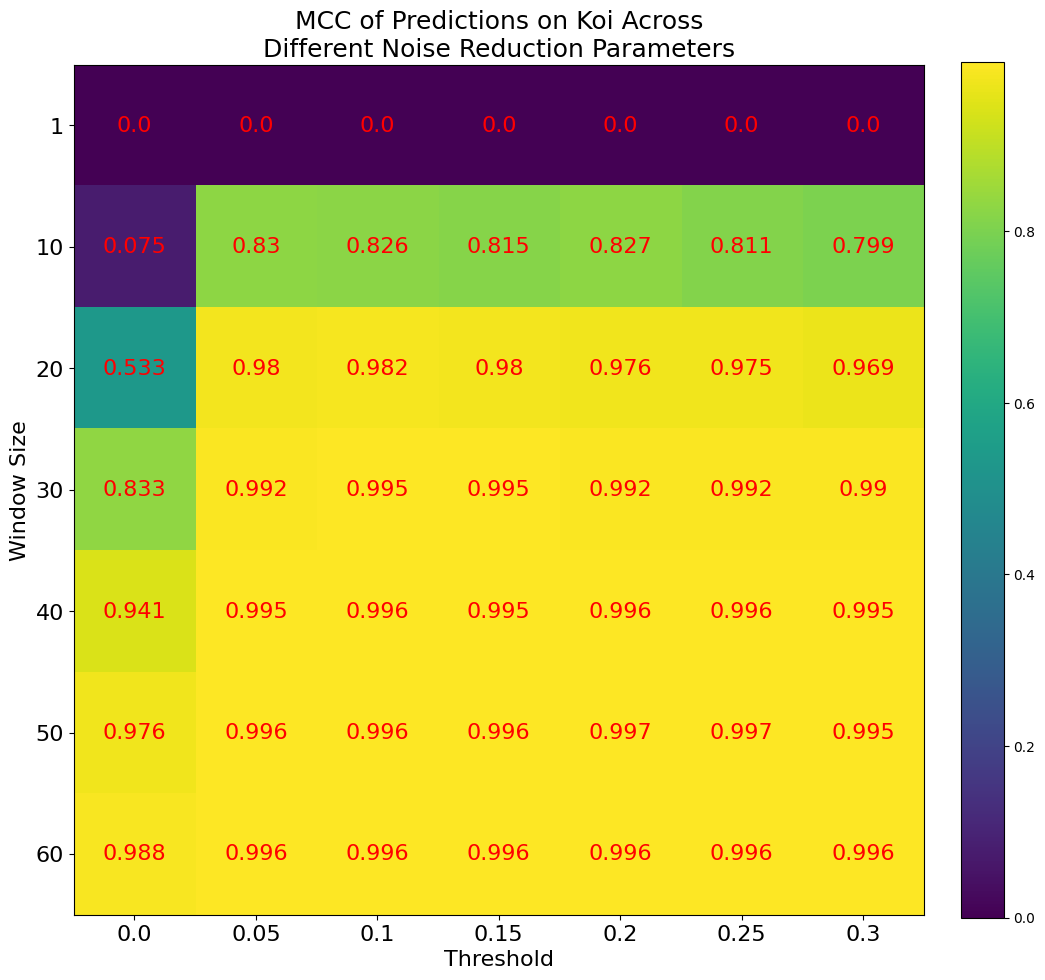

In [30]:
visualise_7b = []

for ws in window_sizes:
    row = []
    for t in thresholds:
        row.append(results_7b[(ws, t)]["mcc"])
    visualise_7b.append(row)

plt.imshow(visualise_7b, cmap='viridis', interpolation='nearest')

for i in range(len(visualise_7b)):
    for j in range(len(visualise_7b[i])):
        plt.text(j, i, round(visualise_7b[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Threshold", size=16)
plt.ylabel("Window Size", size=16)
plt.title("MCC of Predictions on Koi Across\nDifferent Noise Reduction Parameters", size=18)

plt.xticks(list(range(len(thresholds))), thresholds, size=16)
plt.yticks(list(range(len(window_sizes))), window_sizes, size=16)

plt.colorbar(fraction=0.046, pad=0.04)
plt.gcf().set_size_inches(12, 12)

plt.savefig(path.join(cd, "classification", "test7", "test7b_full_range.png"))

plt.show()

## Test 7-Extra

### Extra Part I

In [4]:
ws = [1, 10, 20]

results_7ex = {}
truth_7ex = {}

for w in ws:
    process = lambda x : mf.changes_in_changes(mf.vel(x), w, 0.1)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    truth_7ex[w] = testing_labels_merged

    results_7ex[w] = mc.test_classify(clf, testing_data_merged, testing_labels_merged)

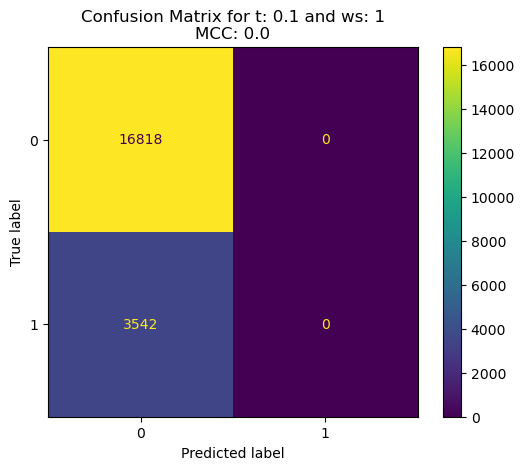

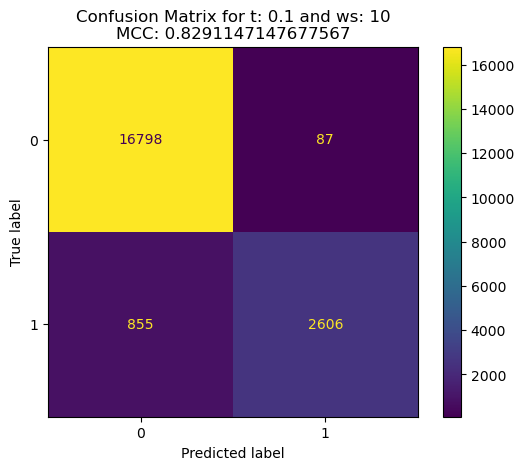

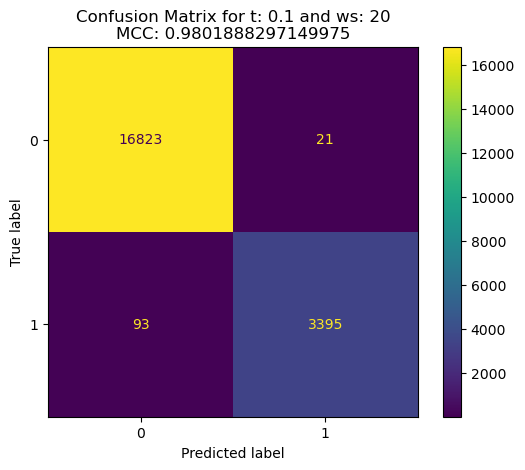

In [7]:
for w in ws:
    cmd = ConfusionMatrixDisplay.from_predictions(truth_7ex[w], results_7ex[w]["predictions"])
    cmd.ax_.set_title(f"Confusion Matrix for t: 0.1 and ws: {w}\nMCC: {results_7ex[w]['mcc']}")

plt.show()

### Extra Part II

In [8]:
ws = [1, 10, 20]

results_7ex2 = {}
truth_7ex2 = {}

for w in ws:
    process = lambda x : mf.changes_in_changes(mf.vel(x), w, 0.1)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, _, training_labels, _ = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    truth_7ex2[w] = training_labels

    results_7ex2[w] = mc.test_classify(clf, training_data, training_labels)

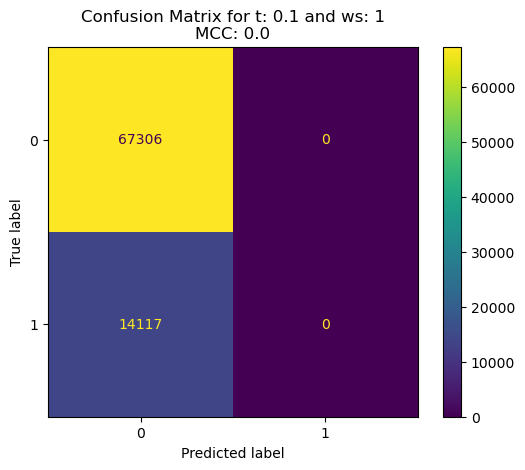

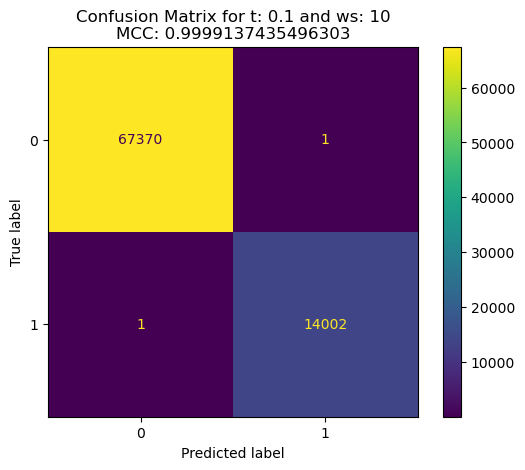

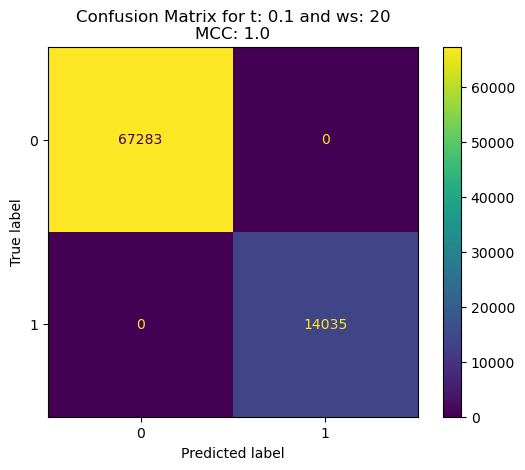

In [9]:
for w in ws:
    cmd = ConfusionMatrixDisplay.from_predictions(truth_7ex2[w], results_7ex2[w]["predictions"])
    cmd.ax_.set_title(f"Confusion Matrix for t: 0.1 and ws: {w}\nMCC: {results_7ex2[w]['mcc']}")

plt.show()

## Test 7C: Multiple Monkeys

**Aim**: Check if using a combination of monkeys improves overall prediction results.

**Feature(s) Tested**: Directional Change

**Noise Correction**: Threshold (0.1) and Sliding Window (30)

**Class Balance**: Balanced

In [3]:
pose_data_merged = {}
labels_merged = {}

for name in names_all:
    pose_data_merged[name] = np.concatenate(list(pose_data_all[name].values()))
    labels_merged[name] = np.concatenate(list(labels_all[name].values()))

process = lambda x : mf.changes_in_changes(mf.vel(x), 30, 0.1)
processed_data, processed_labels = mc.process_data(pose_data_merged, labels_merged, process)

In [5]:
def merge_data(data, labels, names):
    data_merged = np.concatenate([data[name] for name in names])
    labels_merged = np.concatenate([labels[name] for name in names])
    return data_merged, labels_merged

monke_names = [n for n in names_all]
pd_names = {"koi", "boba", "bandung"}

training_data, test_data, training_labels, test_labels = mc.prep_multi_train_test_data(processed_data, processed_labels, monke_names)
test_data_merged, test_labels_merged = merge_data(test_data, test_labels, names_all)

results_7c = []
clf = RandomForestClassifier(class_weight="balanced")

for i in range(2, 6+1):
    combos = itertools.combinations(names_all, i)
    n_results = {}

    for c in combos:
        if any(name in pd_names for name in c):
            clf.fit(*merge_data(training_data, training_labels, c))
            n_results[c] = mc.test_classify(clf, test_data_merged, test_labels_merged)
 
    results_7c.append(n_results)

In [19]:
mccs_7c = []
set_size = 2

for set in results_7c:
    results_n = []
    for combo in set:
        results_n.append(set[combo]["mcc"])
    mccs_7c.append(np.array(results_n))
    set_size += 1

means_7c = [np.mean(m) for m in mccs_7c]
variance_7c = [np.var(m) for m in mccs_7c]

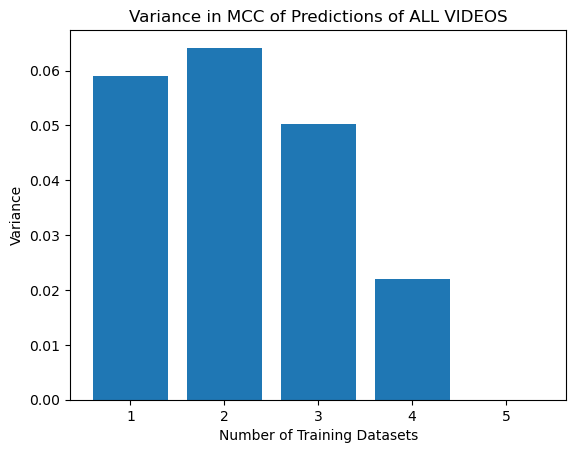

In [20]:
xticks = list(range(1, len(variance_7c)+1))
plt.bar(xticks, variance_7c)
plt.title("Variance in MCC of Predictions of ALL VIDEOS")
plt.xlabel("Number of Training Datasets")
plt.ylabel("Variance")
plt.xticks(xticks)
plt.show()

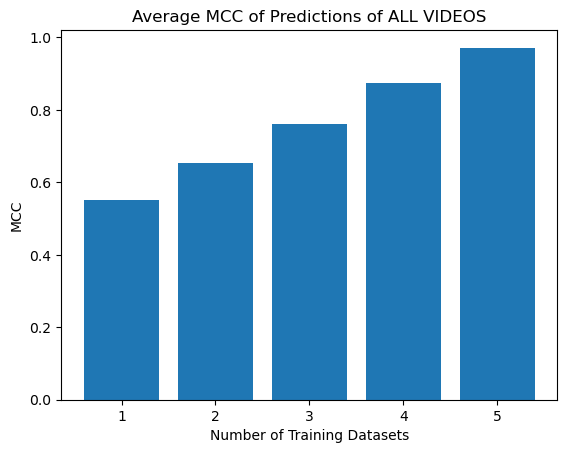

In [21]:
plt.bar(xticks, means_7c)
plt.title("Average MCC of Predictions of ALL VIDEOS")
plt.xlabel("Number of Training Datasets")
plt.ylabel("MCC")
plt.xticks(xticks)
plt.show()

## Test 7D: MultiMonke Matrix

**Aim**: Check if using a combination of monkeys improves overall prediction results.

**Feature(s) Tested**: Directional Change

**Noise Correction**: Threshold (0.1) and Sliding Window (30)

**Class Balance**: Balanced

In [46]:
train_data_7d = {}
test_data_7d = {}
train_labels_7d = {}
test_labels_7d = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data_7d[name], test_data_dict, train_labels_7d[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

    test_data_7d[name] = np.concatenate(list(test_data_dict.values()))
    test_labels_7d[name] = np.concatenate(list(test_labels_dict.values()))


In [64]:
results_7d = {}

# train_combos = ["koi", "boba", "bandung", ("koi", "boba"), ("bandung", "boba"), ("koi", "bandung")]
train_combos = ["koi", "boba", ("koi", "boba")]

clf = RandomForestClassifier(class_weight="balanced")

for train_combo in train_combos:
    results_7d[train_combo] = {}

    if type(train_combo) is tuple:
        clf.fit(*merge_data(train_data_7d, train_labels_7d, train_combo))
    else:
        clf.fit(train_data_7d[train_combo], train_labels_7d[train_combo])

    for test_name in names_all:
        results_7d[train_combo][test_name] = mc.test_classify(clf, test_data_7d[test_name], test_labels_7d[test_name])

In [65]:
mccs_7d = []
train_only = ["koi", "boba"]#, "bandung"]

for train_combo in results_7d:
    row = []
    for test_name in train_only:
        row.append(results_7d[train_combo][test_name]["mcc"])
    mccs_7d.append(row)

acc_7d = []
test_only_names = ["horlicks", "briyani", "tutukueh"]

for train_combo in results_7d:
    row = []
    for test_name in test_only_names:
        row.append(results_7d[train_combo][test_name]["accuracy"])
    acc_7d.append(row)

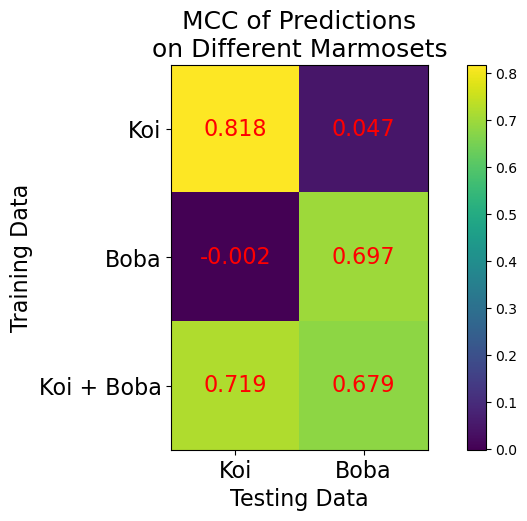

In [68]:
def str_process(name):
    if type(name) is tuple:
        return f"{name[0].capitalize()} + {name[1].capitalize()}"
    return name.capitalize()

plt.imshow(mccs_7d, cmap='viridis', interpolation='nearest')

for i in range(len(mccs_7d)):
    for j in range(len(mccs_7d[i])):
        plt.text(j, i, round(mccs_7d[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("MCC of Predictions\non Different Marmosets", size=18)

plt.xticks(list(range(len(train_only))), [str_process(s) for s in train_only], size=16)
plt.yticks(list(range(len(train_combos))), [str_process(s) for s in train_combos], size=16)

plt.colorbar()
plt.gcf().set_size_inches(10, 5)

# Show the plot
plt.show()

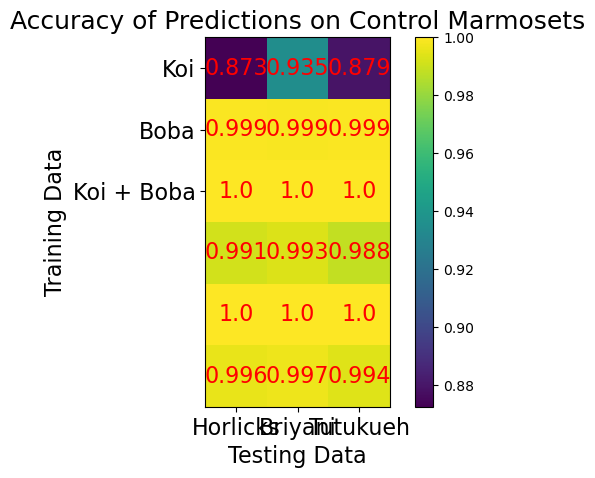

In [62]:
plt.imshow(acc_7d, cmap='viridis', interpolation='nearest')

for i in range(len(acc_7d)):
    for j in range(len(acc_7d[i])):
        plt.text(j, i, round(acc_7d[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("Accuracy of Predictions on Control Marmosets", size=18)

plt.xticks(list(range(len(test_only_names))), [str_process(s) for s in test_only_names], size=16)
plt.yticks(list(range(len(train_combos))), [str_process(s) for s in train_combos], size=16)

plt.colorbar()
plt.show()

## Ultimate Final Model